In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the training set
dataset_train = pd.read_csv(r"C:\Users\NEW\Desktop\testset.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
#60 times steps- at each time t and look at 60 previous time steps, then make new prediction 
# 1 time step leads to overfitting, 20 is still too low
#60 previous financial days- in 3 months 
X_train = []
y_train = []
for i in range(60, 125): # upper bound is number of values 
  X_train.append(training_set_scaled[i-60:i, 0]) #takes 60 previous stock prices from 60 past stock prices
  y_train.append(training_set_scaled[i, 0]) #contains stock price learned to predict 
X_train, y_train = np.array(X_train), np.array(y_train) # make into numpy arrays 
#Need to add dimension to because not only prescition with one stock price but other indicators (like other columns in dataset  or other stocks that may affect this one )

In [9]:
!pip install tensorflow

  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)


In [10]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# Initialising the RNN
regressor = Sequential() #reps sequence of layers, predicting continous values (so it is a regression)

In [12]:
# Adding the first LSTM layer and some Dropout regularisation
#dropout to prevent overfitting
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))#regressor- object of sequential class, can add layers to networ.
#use lstm class and create object of lstm class- 3 args
#num of units, return sequences- set to true because is stacked lstms, and shape
#units- neurons in first layer. 50 in layers for high dimensionality, can capture upward and downward
regressor.add(Dropout(0.2))
# takes arg of dropout late- num of neurons want to drop. dropping 20% of neurons to be ignored during trianingn for each iteratin. 10 neurons will be dropped out

In [13]:
# Adding a second LSTM layer and some Dropout regularisation
# total of 4 layers, simply need to copy, only change is input shape so dont need to specify that, automatically recognised through input shape

regressor.add(LSTM(units = 50, return_sequences = True)) 

regressor.add(Dropout(0.2))

In [14]:
# Adding a third LSTM layer and some Dropout regularisation
# same as second layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
# Adding a fourth LSTM layer and some Dropout regularisation
# almost same, but return sequence is false because it is the last lstm layer (so it is removed becasue default is false)
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [16]:
# Adding the output layer
#add fully connected layer through dense class- dimesion/units/neurons is 1
regressor.add(Dense(units = 1))

In [17]:
# Compiling the RNN
#regressior because predicting continuous value, 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
# Fitting the RNN to the Training set
#have not made connection to training set, training will take place
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32) # CHANGE BACK TO 100 IF NOT WORK
#100 gives good convergence
# trained on certain batch sizes, 

Epoch 1/200
3/3 [==============================] - 23s 277ms/step - loss: 0.2636
Epoch 2/200
3/3 [==============================] - 1s 235ms/step - loss: 0.1632
Epoch 3/200
3/3 [==============================] - 1s 226ms/step - loss: 0.0888
Epoch 4/200
3/3 [==============================] - 1s 203ms/step - loss: 0.1043
Epoch 5/200
3/3 [==============================] - 1s 181ms/step - loss: 0.0784
Epoch 6/200
3/3 [==============================] - 1s 170ms/step - loss: 0.0750
Epoch 7/200
3/3 [==============================] - 1s 159ms/step - loss: 0.1226
Epoch 8/200
3/3 [==============================] - 0s 156ms/step - loss: 0.1363
Epoch 9/200
3/3 [==============================] - 0s 145ms/step - loss: 0.1239
Epoch 10/200
3/3 [==============================] - 0s 143ms/step - loss: 0.1129
Epoch 11/200
3/3 [==============================] - 0s 133ms/step - loss: 0.0802
Epoch 12/200
3/3 [==============================] - 0s 131ms/step - loss: 0.0627
Epoch 13/200
3/3 [==================

In [21]:
# Getting the real stock price of 2018
dataset_test = pd.read_csv(r"C:\Users\NEW\Desktop\testset.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values #getting input of each previous financial days
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


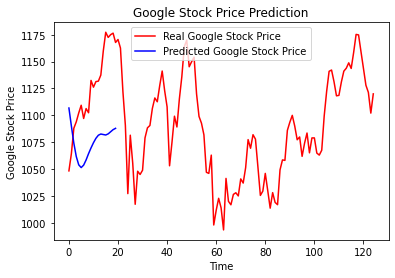

In [24]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()